Msc Data Science and Economics

Università degli Studi di Milano

Martina Viggiano (954603)

## *Perspectives on data sharing: a social media analysis*

# **4. Exploration Sentiment Analysis of Filtered Data**

Summary:

1.   IMPORTS
2.   SENTIMENT ANALYSIS
    * 2.1 Visualize Sentiment by using *matplotlib*
    * 2.2 Visualize Sentiment by using *plotly*
3. EXPLORATIVE ON POSITIVE AND NEGATIVE SENTIMENT

---

## 1. **IMPORTS**


We connect the notebook to our personal Google Drive folder: it will be used to store and load data.

In [ ]:
# Connect Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Università/Thesis/')

We import and download libraries and packages.

In [ ]:
# install plotly
!pip install plotly==5.5.0

In [ ]:
# Import libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from tqdm.notebook import tqdm
tqdm.pandas()
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from pprint import pprint

Load back data

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/keyword_df.pkl", "rb") as f:
    keyword_df = pickle.load(f)

In [ ]:
keyword_df.shape[0]

11959

Pre and post Covid19 era data

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/filter_pre_covid.pkl", "rb") as f:
    filter_pre_covid = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/filter_post_covid.pkl", "rb") as f:
    filter_post_covid = pickle.load(f)

---

## 2. **SENTIMENT ANALYSIS**

In [ ]:
sia = SentimentIntensityAnalyzer()

### 2.1 Visualize Sentiment by using *matplotlib*

In [ ]:
keyword_df['polarity'] = keyword_df['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])
filter_pre_covid['polarity'] = filter_pre_covid['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])
filter_post_covid['polarity'] = filter_post_covid['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])

  0%|          | 0/11959 [00:00<?, ?it/s]

  0%|          | 0/3362 [00:00<?, ?it/s]

  0%|          | 0/2408 [00:00<?, ?it/s]

In [ ]:
data_2018 = keyword_df[keyword_df['year']==2018]
data_2019 = keyword_df[keyword_df['year']==2019]
data_2020 = keyword_df[keyword_df['year']==2020]
data_2021 = keyword_df[keyword_df['year']==2021]

In [ ]:
conditions = [
    (data_2018['hashtags'].str.contains('opendata')),
    (data_2018['hashtags'].str.contains('datasharing')),
    (data_2018['hashtags'].str.contains('openscience')),
    (data_2018['hashtags'].str.contains('openresearch')),
    (data_2018['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_2018['4_hashtags'] = np.select(conditions, choices, default='others')

In [ ]:
conditions = [
    (data_2019['hashtags'].str.contains('opendata')),
    (data_2019['hashtags'].str.contains('datasharing')),
    (data_2019['hashtags'].str.contains('openscience')),
    (data_2019['hashtags'].str.contains('openresearch')),
    (data_2019['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_2019['4_hashtags'] = np.select(conditions, choices, default='others')

In [ ]:
conditions = [
    (data_2020['hashtags'].str.contains('opendata')),
    (data_2020['hashtags'].str.contains('datasharing')),
    (data_2020['hashtags'].str.contains('openscience')),
    (data_2020['hashtags'].str.contains('openresearch')),
    (data_2020['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_2020['4_hashtags'] = np.select(conditions, choices, default='others')

In [ ]:
conditions = [
    (data_2021['hashtags'].str.contains('opendata')),
    (data_2021['hashtags'].str.contains('datasharing')),
    (data_2021['hashtags'].str.contains('openscience')),
    (data_2021['hashtags'].str.contains('openresearch')),
    (data_2021['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_2021['4_hashtags'] = np.select(conditions, choices, default='others')

Sentiment in 2018, distinguishing between hashtags.

Number of tweets 2018: 1609


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

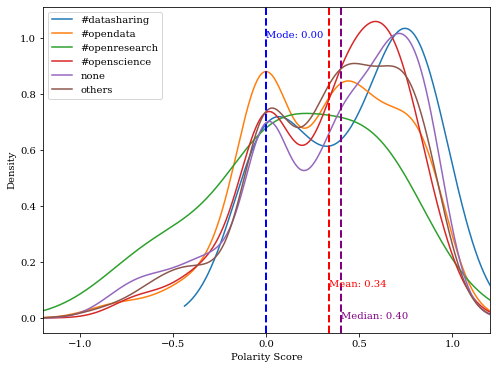

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif' # Font of text
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_2018.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_2018.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_2018.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_2018.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_2018.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_2018.polarity)), color='blue')
plt.text(data_2018.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_2018.polarity.mean()), color='red')
plt.text(np.median(data_2018.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_2018.polarity)), color='purple')
print('Number of tweets 2018:', data_2018.shape[0])
fig.savefig('polarity_2018.png')
files.download('polarity_2018.png')

Sentiment in 2019, distinguishing between hashtags.

Number of tweets 2019: 1753


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

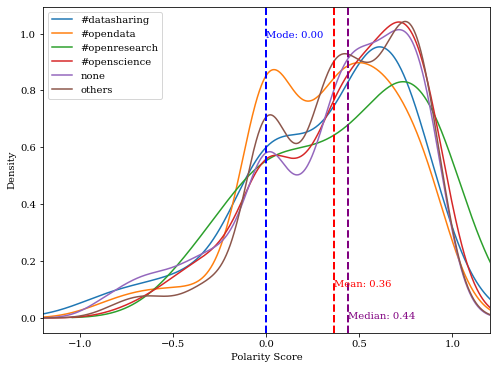

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_2019.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_2019.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_2019.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_2019.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_2019.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_2019.polarity)), color='blue')
plt.text(data_2019.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_2019.polarity.mean()), color='red')
plt.text(np.median(data_2019.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_2019.polarity)), color='purple')
print('Number of tweets 2019:', data_2019.shape[0])
fig.savefig('polarity_2019.png')
files.download('polarity_2019.png')

Sentiment in 2020, distinguishing between hashtags.

Number of tweets 2020: 1197


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

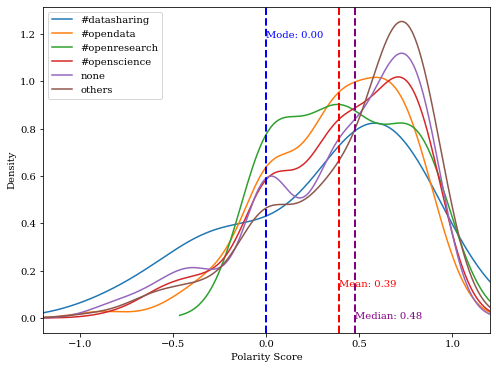

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_2020.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_2020.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_2020.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_2020.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_2020.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_2020.polarity)), color='blue')
plt.text(data_2020.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_2020.polarity.mean()), color='red')
plt.text(np.median(data_2020.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_2020.polarity)), color='purple')
print('Number of tweets 2020:', data_2020.shape[0])
fig.savefig('polarity_2020.png')
files.download('polarity_2020.png')

Sentiment in 2021, distinguishing between hashtags.

Number of tweets 2021: 1211


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

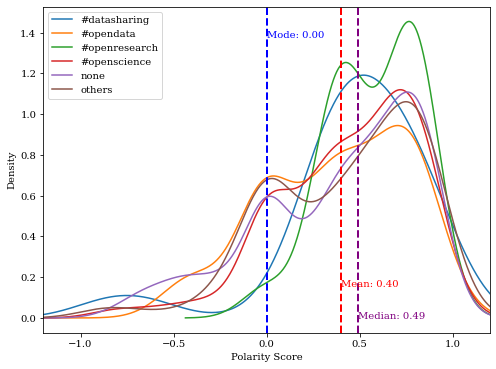

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_2021.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_2021.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_2021.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_2021.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_2021.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_2021.polarity)), color='blue')
plt.text(data_2021.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_2021.polarity.mean()), color='red')
plt.text(np.median(data_2021.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_2021.polarity)), color='purple')
print('Number of tweets 2021:', data_2021.shape[0])
fig.savefig('polarity_2021.png')
files.download('polarity_2021.png')

### 2.2 Visualize Sentiment by using *plotly*

Sentiment in #opendata tweets, distinguishing between years.

In [ ]:
#OpenData

hist_data = [data_2018[data_2018['hashtags'].str.contains('opendata')].polarity, data_2019[data_2019['hashtags'].str.contains('opendata')].polarity, 
             data_2020[data_2020['hashtags'].str.contains('opendata')].polarity,  data_2021[data_2021['hashtags'].str.contains('opendata')].polarity]

group_labels = ['2018', '2019', '2020', '2021']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=data_2018[data_2018['hashtags'].str.contains('opendata')].polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=data_2019[data_2019['hashtags'].str.contains('opendata')].polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=data_2020[data_2020['hashtags'].str.contains('opendata')].polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=data_2021[data_2021['hashtags'].str.contains('opendata')].polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('opendata')].polarity), line_width=2,line_color="purple")


fig.add_annotation(x=(data_2018[data_2018['hashtags'].str.contains('opendata')].polarity.mean() + data_2021.polarity[data_2021['hashtags'].str.contains('opendata')].mean())/2, 
            y=1.05,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=(statistics.mode(data_2018[data_2018['hashtags'].str.contains('opendata')].polarity) + statistics.mode(data_2021[data_2021['hashtags'].str.contains('opendata')].polarity))/2, 
            y=1.05,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

#avg
fig.add_annotation(x=data_2018[data_2018['hashtags'].str.contains('opendata')].polarity.mean(), y=0.15, 
            text=round(data_2018[data_2018['hashtags'].str.contains('opendata')].polarity.mean(),2) , showarrow=False, 
            font=dict(color="forestgreen"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2019[data_2019['hashtags'].str.contains('opendata')].polarity.mean(), y=0.28, 
            text=round(data_2019[data_2019['hashtags'].str.contains('opendata')].polarity.mean(),2), showarrow=False, 
            font=dict(color="gold"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2020[data_2020['hashtags'].str.contains('opendata')].polarity.mean(), y=0.4, 
            text=round(data_2020[data_2020['hashtags'].str.contains('opendata')].polarity.mean(),2), showarrow=False, 
            font=dict(color="firebrick"), align="right", bgcolor="white",  opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2021[data_2021['hashtags'].str.contains('opendata')].polarity.mean(), y=0.5, 
            text=round(data_2021[data_2021['hashtags'].str.contains('opendata')].polarity.mean(),2), showarrow=False, 
            font=dict(color="royalblue"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(data_2021[data_2021['hashtags'].str.contains('opendata')].polarity), y=0.3, 
            text=statistics.mode(data_2021[data_2021['hashtags'].str.contains('opendata')].polarity), showarrow=False, 
            font=dict(color="purple"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#fig.update_yaxes(range=[-0.05, 1.25])

fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='Sentiment for #opendata in 2018, 2019, 2020 and 2021', yaxis = dict(tickmode = 'linear', tick0 = 0.0 ,dtick = 0.25), autosize=False, width=1000)
fig.show()

Sentiment in #openscience tweets, distinguishing between years.

In [ ]:
#OpenScience

hist_data = [data_2018[data_2018['hashtags'].str.contains('openscience')].polarity, data_2019[data_2019['hashtags'].str.contains('openscience')].polarity, 
             data_2020[data_2020['hashtags'].str.contains('openscience')].polarity,  data_2021[data_2021['hashtags'].str.contains('openscience')].polarity]

group_labels = ['2018', '2019', '2020', '2021']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=data_2018[data_2018['hashtags'].str.contains('openscience')].polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=data_2019[data_2019['hashtags'].str.contains('openscience')].polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=data_2020[data_2020['hashtags'].str.contains('openscience')].polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=data_2021[data_2021['hashtags'].str.contains('openscience')].polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('openscience')].polarity), line_width=2,line_color="purple")


fig.add_annotation(x=(data_2018[data_2018['hashtags'].str.contains('openscience')].polarity.mean() + data_2021.polarity[data_2021['hashtags'].str.contains('openscience')].mean())/2, 
            y=1.05,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=(statistics.mode(data_2018[data_2018['hashtags'].str.contains('openscience')].polarity) + statistics.mode(data_2021[data_2021['hashtags'].str.contains('openscience')].polarity))/2, 
            y=1.05,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

#avg
fig.add_annotation(x=data_2018[data_2018['hashtags'].str.contains('openscience')].polarity.mean(), y=0.15, 
            text=round(data_2018[data_2018['hashtags'].str.contains('openscience')].polarity.mean(),2) , showarrow=False, 
            font=dict(color="forestgreen"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2019[data_2019['hashtags'].str.contains('openscience')].polarity.mean(), y=0.28, 
            text=round(data_2019[data_2019['hashtags'].str.contains('openscience')].polarity.mean(),2), showarrow=False, 
            font=dict(color="gold"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2020[data_2020['hashtags'].str.contains('openscience')].polarity.mean(), y=0.4, 
            text=round(data_2020[data_2020['hashtags'].str.contains('openscience')].polarity.mean(),2), showarrow=False, 
            font=dict(color="firebrick"), align="right", bgcolor="white",  opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2021[data_2021['hashtags'].str.contains('openscience')].polarity.mean(), y=0.5, 
            text=round(data_2021[data_2021['hashtags'].str.contains('openscience')].polarity.mean(),2), showarrow=False, 
            font=dict(color="royalblue"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(data_2021[data_2021['hashtags'].str.contains('openscience')].polarity), y=0.3, 
            text=statistics.mode(data_2021[data_2021['hashtags'].str.contains('openscience')].polarity), showarrow=False, 
            font=dict(color="purple"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#fig.update_yaxes(range=[-0.05, 1.25])

fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='Sentiment for #openscience in 2018, 2019, 2020 and 2021', yaxis = dict(tickmode = 'linear', tick0 = 0.0 ,dtick = 0.25), autosize=False, width=1000)

fig.show()

Sentiment in #openresearch tweets, distinguishing between years.

In [ ]:
#OpenResearch

hist_data = [data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity, data_2019[data_2019['hashtags'].str.contains('openresearch')].polarity, 
             data_2020[data_2020['hashtags'].str.contains('openresearch')].polarity,  data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity]

group_labels = ['2018', '2019', '2020', '2021']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=data_2019[data_2019['hashtags'].str.contains('openresearch')].polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=data_2020[data_2020['hashtags'].str.contains('openresearch')].polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity), line_width=2,line_color="purple")


fig.add_annotation(x=(data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity.mean() + data_2021.polarity[data_2021['hashtags'].str.contains('openresearch')].mean())/2, 
            y=1.25,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=(statistics.mode(data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity) + statistics.mode(data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity))/2, 
            y=1.25,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

#avg
fig.add_annotation(x=data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity.mean(), y=0.2, 
            text=round(data_2018[data_2018['hashtags'].str.contains('openresearch')].polarity.mean(),2) , showarrow=False, 
            font=dict(color="forestgreen"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2019[data_2019['hashtags'].str.contains('openresearch')].polarity.mean(), y=0.28, 
            text=round(data_2019[data_2019['hashtags'].str.contains('openresearch')].polarity.mean(),2), showarrow=False, 
            font=dict(color="gold"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2020[data_2020['hashtags'].str.contains('openresearch')].polarity.mean(), y=0.4, 
            text=round(data_2020[data_2020['hashtags'].str.contains('openresearch')].polarity.mean(),2), showarrow=False, 
            font=dict(color="firebrick"), align="right", bgcolor="white",  opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity.mean(), y=0.5, 
            text=round(data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity.mean(),2), showarrow=False, 
            font=dict(color="royalblue"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity), y=0.3, 
            text=statistics.mode(data_2021[data_2021['hashtags'].str.contains('openresearch')].polarity), showarrow=False, 
            font=dict(color="purple"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#fig.update_yaxes(range=[-0.05, 1.25])

fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='Sentiment for #openresearch in 2018, 2019, 2020 and 2021',  yaxis = dict(tickmode = 'linear', tick0 = 0.0 ,dtick = 0.25), autosize=False, width=1000)
fig.show()

Sentiment in #datasharing tweets, distinguishing between years.

In [ ]:
#DataSharing

#from statistics import multimode

hist_data = [data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity, data_2019[data_2019['hashtags'].str.contains('datasharing')].polarity, 
             data_2020[data_2020['hashtags'].str.contains('datasharing')].polarity,  data_2021[data_2021['hashtags'].str.contains('datasharing')].polarity]

group_labels = ['2018', '2019', '2020', '2021']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=data_2019[data_2019['hashtags'].str.contains('datasharing')].polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=data_2020[data_2020['hashtags'].str.contains('datasharing')].polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=data_2021[data_2021['hashtags'].str.contains('datasharing')].polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity), line_width=2,line_color="purple")
fig.add_vline(x=statistics.mode(data_2019[data_2019['hashtags'].str.contains('datasharing')].polarity), line_width=2,line_color="purple")


fig.add_annotation(x=(data_2020[data_2020['hashtags'].str.contains('datasharing')].polarity.mean() + data_2021.polarity[data_2021['hashtags'].str.contains('datasharing')].mean())/2, 
            y=1.1,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity), 
            y=1.1,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

#avg
fig.add_annotation(x=data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity.mean(), y=0.15, 
            text=round(data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity.mean(),2) , showarrow=False, 
            font=dict(color="forestgreen"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2019[data_2019['hashtags'].str.contains('datasharing')].polarity.mean(), y=0.18, 
            text=round(data_2019[data_2019['hashtags'].str.contains('datasharing')].polarity.mean(),2), showarrow=False, 
            font=dict(color="gold"), align="right", bgcolor="white", opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2020[data_2020['hashtags'].str.contains('datasharing')].polarity.mean(), y=0.3, 
            text=round(data_2020[data_2020['hashtags'].str.contains('datasharing')].polarity.mean(),2), showarrow=False, 
            font=dict(color="firebrick"), align="right", bgcolor="white",  opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2021[data_2021['hashtags'].str.contains('datasharing')].polarity.mean(), y=0.4, 
            text=round(data_2021[data_2021['hashtags'].str.contains('datasharing')].polarity.mean(),2), showarrow=False, 
            font=dict(color="royalblue"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity), y=0.2, 
            text=statistics.mode(data_2018[data_2018['hashtags'].str.contains('datasharing')].polarity), showarrow=False, 
            font=dict(color="purple"), align="right", bgcolor="white", opacity=0.9,borderpad=4)

#fig.update_yaxes(range=[-0.05, 1.25])

fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='Sentiment for #datasharing in 2018, 2019, 2020 and 2021', yaxis = dict(tickmode = 'linear', tick0 = 0.0 ,dtick = 0.25), autosize=False, width=1000)

fig.show()

Sentiment in general in all tweets.

In [ ]:
hist_data = [data_2018.polarity, data_2019.polarity, data_2020.polarity,  data_2021.polarity]

group_labels = ['2018', '2019', '2020', '2021']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=data_2018.polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=data_2019.polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=data_2020.polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=data_2021.polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(data_2021.polarity), line_width=2,line_color="purple")

fig.add_annotation(x=(data_2018.polarity.mean() + data_2021.polarity.mean())/2, y=1.1,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=(statistics.mode(data_2018.polarity) + statistics.mode(data_2021.polarity))/2, y=1.1,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)


#avg
fig.add_annotation(x=data_2018.polarity.mean(), y=0.1, text=round(data_2018.polarity.mean(),2) , showarrow=False, font=dict(color="forestgreen"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2019.polarity.mean(), y=0.2, text=round(data_2019.polarity.mean(),2), showarrow=False, font=dict(color="gold"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2020.polarity.mean(), y=0.3, text=round(data_2020.polarity.mean(),2), showarrow=False, font=dict(color="firebrick"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=data_2021.polarity.mean(), y=0.4, text=round(data_2021.polarity.mean(),2), showarrow=False, font=dict(color="royalblue"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(data_2021.polarity), y=0.3, text=statistics.mode(data_2021.polarity), showarrow=False, font=dict(color="purple"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)

fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='General Sentiment in 2018, 2019, 2020 and 2021')
fig.show()

In [ ]:
h_opendata = keyword_df[keyword_df['hashtags'].str.contains('opendata')]
h_openscience = keyword_df[keyword_df['hashtags'].str.contains('openscience')]
h_openresearch = keyword_df[keyword_df['hashtags'].str.contains('openresearch')]
h_datasharing = keyword_df[keyword_df['hashtags'].str.contains('datasharing')]

In [ ]:
#per hashtag

hist_data = [h_opendata.polarity, h_openscience.polarity, h_openresearch.polarity,  h_datasharing.polarity]

group_labels = ['#opendata', '#openscience', '#openresearch', '#datasharing']
colors = ['forestgreen', 'gold', 'firebrick', 'royalblue']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         show_hist=False)

#avg
fig.add_vline(x=h_opendata.polarity.mean(), line_width=2, line_dash="dash", line_color="forestgreen")
fig.add_vline(x=h_openscience.polarity.mean(), line_width=2, line_dash="dash", line_color="gold")
fig.add_vline(x=h_openresearch.polarity.mean(), line_width=2, line_dash="dash", line_color="firebrick")
fig.add_vline(x=h_datasharing.polarity.mean(), line_width=2, line_dash="dash", line_color="royalblue")

#mode
fig.add_vline(x=statistics.mode(h_datasharing.polarity), line_width=2,line_color="purple")

fig.add_annotation(x=(h_opendata.polarity.mean() + h_datasharing.polarity.mean())/2, y=1.1,
            text="Averages",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)

fig.add_annotation(x=(statistics.mode(h_opendata.polarity) + statistics.mode(h_datasharing.polarity))/2, y=1.1,
            text="Modes",
            showarrow=False,
            font=dict(color="black"),
            yshift=0,bgcolor="white",
            opacity=0.9,borderpad=4)


#avg
fig.add_annotation(x=h_opendata.polarity.mean(), y=0.1, text=round(h_opendata.polarity.mean(),2) , showarrow=False, font=dict(color="forestgreen"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=h_openscience.polarity.mean(), y=0.2, text=round(h_openscience.polarity.mean(),2), showarrow=False, font=dict(color="gold"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=h_openresearch.polarity.mean(), y=0.3, text=round(h_openresearch.polarity.mean(),2), showarrow=False, font=dict(color="firebrick"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)
fig.add_annotation(x=h_datasharing.polarity.mean(), y=0.4, text=round(h_datasharing.polarity.mean(),2), showarrow=False, font=dict(color="royalblue"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)

#mode
fig.add_annotation(x=statistics.mode(h_datasharing.polarity), y=0.3, text=statistics.mode(h_datasharing.polarity), showarrow=False, font=dict(color="purple"), align="right", bgcolor="white",
            opacity=0.9,borderpad=4)


fig.update_xaxes(range=[-1.01, 1.01])

fig.update_layout(title_text='General Sentiment per hashtag')
fig.show()

## 3. **EXPLORATIVE ON POSITIVE AND NEGATIVE SENTIMENT**

In [ ]:
positive = keyword_df[keyword_df.polarity > 0.5] # 4342 
negative = keyword_df[keyword_df.polarity < -0.5] # 414

In [ ]:
positive_pre = filter_pre_covid[filter_pre_covid.polarity > 0.5] # 1455
negative_pre = filter_pre_covid[filter_pre_covid.polarity < -0.5] # 149

In [ ]:
positive_post = filter_post_covid[filter_post_covid.polarity > 0.5] # 1171
negative_post = filter_post_covid[filter_post_covid.polarity < -0.5] # 92

In [ ]:
def get_top_n_words_(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    c = pd.DataFrame.from_dict({word: freq/len(corpus) for word, freq in words_freq[:n]}, orient='index').reset_index()
    c = c.rename(columns={'index': 'words', 0: 'freq'})
    return c

In [ ]:
cmw_pos = get_top_n_words_(positive['text_clean_notop'], 50)
cmw_pos.columns = ["words", "freq"]
cmw_neg = get_top_n_words_(negative['text_clean_notop'], 50)
cmw_neg.columns = ["words", "freq"]
cmw_pos_pre = get_top_n_words_(positive_pre['text_clean_notop'], 50)
cmw_pos_pre.columns = ["words", "freq"]
cmw_neg_pre = get_top_n_words_(negative_pre['text_clean_notop'], 50)
cmw_neg_pre.columns = ["words", "freq"]
cmw_pos_post = get_top_n_words_(positive_post['text_clean_notop'], 50)
cmw_pos_post.columns = ["words", "freq"]
cmw_neg_post = get_top_n_words_(negative_post['text_clean_notop'], 50)
cmw_neg_post.columns = ["words", "freq"]

In [ ]:
top_terms_sentiment = pd.concat([cmw_pos[:10], cmw_neg[:10]], axis=1)
top_terms_sentiment.set_axis(['positive', ' ','negative', ' '], axis=1)

,positive,,negative,
0,share,0.202088,researcher,0.136476
1,researcher,0.177494,cancer,0.129032
2,access,0.113689,bad,0.126551
3,good,0.111369,access,0.106700
4,great,0.098144,problem,0.086849
5,need,0.093968,academic,0.086849
6,like,0.089327,need,0.084367
7,work,0.087935,work,0.081886
8,support,0.073782,find,0.081886
9,use,0.061485,publish,0.059553


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cmw_pos['words'][:30],
    y=cmw_pos['freq'][:30],
    name='Positive',
    marker_color='forestgreen'
))
fig.add_trace(go.Bar(
    x=cmw_neg['words'][:30],
    y=cmw_neg['freq'][:30],
    name='Negative',
    marker_color='firebrick'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Top 20 most frequent words belonging to positive and negative labelled tweets',
                   yaxis_title='Words Frequency %')

fig.show()

In [ ]:
top_terms_sentiment_pre = pd.concat([cmw_pos_pre[:10], cmw_neg_pre[:10]], axis=1)
top_terms_sentiment_pre.set_axis(['positive', ' ','negative', ' '], axis=1)

,positive,,negative,
0,share,0.197634,cancer,0.127517
1,researcher,0.162839,researcher,0.127517
2,good,0.139179,access,0.107383
3,access,0.130828,bad,0.107383
4,like,0.116910,problem,0.107383
5,work,0.111343,work,0.093960
6,great,0.101601,academic,0.093960
7,need,0.098817,need,0.080537
8,support,0.079332,analysis,0.080537
9,use,0.073765,available,0.073826


In [ ]:
top_terms_sentiment_post = pd.concat([cmw_pos_post[:10], cmw_neg_post[:10]], axis=1)
top_terms_sentiment_post.set_axis(['positive', ' ','negative', ' '], axis=1)

,positive,,negative,
0,share,0.230703,find,0.195652
1,researcher,0.205832,researcher,0.173913
2,work,0.124357,work,0.141304
3,like,0.116638,bad,0.141304
4,need,0.107204,access,0.119565
5,access,0.106346,time,0.119565
6,good,0.096913,think,0.119565
7,support,0.089194,problem,0.108696
8,great,0.078902,share,0.108696
9,way,0.076329,publish,0.108696


In [ ]:
fig = go.Figure()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Pre-Covid19 era", "Post-Covi19 era"))


fig.add_trace(go.Bar(
    x=cmw_pos_pre['words'][:30],
    y=cmw_pos_pre['freq'][:30],
    name='Positive',
    marker_color='forestgreen'
), row=1, col=1)
fig.add_trace(go.Bar(
    x=cmw_neg_pre['words'][:30],
    y=cmw_neg_pre['freq'][:30],
    name='Negative',
    marker_color='firebrick'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=cmw_pos_post['words'][:30],
    y=cmw_pos_post['freq'][:30],
    name='Positive',
    marker_color='forestgreen'
, legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Bar(
    x=cmw_neg_post['words'][:30],
    y=cmw_neg_post['freq'][:30],
    name='Negative',
    marker_color='firebrick'
, legendgroup='group1', showlegend=False), row=2, col=1)


fig.update_xaxes(tickmode='linear', tickangle=-45, row=1, col=1)
fig.update_xaxes(tickmode='linear', tickangle=-45, row=2, col=1)


fig.update_yaxes(title_text="Words Frequency %", row=1, col=1)
fig.update_yaxes(title_text="Words Frequency %", row=2, col=1)



fig.update_layout(barmode='group',  title='Top 30 most frequent words of positive and negative labelled tweets',  height=1000)

fig.show()